# Week06 Data Preprocessing

- **Student ID** : 학번
- **Name** : 이름

- Write and run the code below (including Quiz) in jupyter notebook
- After completion, rename the file, and summit the file to e-class
- Submit file name : **“Week06_\<StudentID\>_\<Name\>.ipynb”**
  - Ex) Week06\_2020123456\_홍길동.ipynb
- Due : **Saturday 11:59pm**

# 1. Dealing with missing data

### Sample data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample-missing-data.csv')
df

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
2,2,0.1,NaN,1
3,3,0.3,20.0,1
4,2,0.2,NaN,0


In [2]:
#check if there are missing values. use .isnull() and .sum()
df.isnull().sum()

A        0
B        0
C        2
label    0
dtype: int64

### Removing a feature

In [3]:
# remove feature 'C'. use .drop()
None

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Removing data with missing values

In [4]:
# remove rows that contain missing values. use .dropna()
None

,A,B,C,label
0,1,0.1,10.0,0
1,2,0.2,20.0,0
3,3,0.3,20.0,1


In [5]:
# remove colomns that contain missing values. use .dropna()
None

,A,B,label
0,1,0.1,0
1,2,0.2,0
2,2,0.1,1
3,3,0.3,1
4,2,0.2,0


### Imputing missing values 

In [6]:
# Impute missing values to mean. use .fillna() and .mean()
None

,A,B,C,label
0,1,0.1,10.000000,0
1,2,0.2,20.000000,0
2,2,0.1,16.666667,1
3,3,0.3,20.000000,1
4,2,0.2,16.666667,0


### Imputing missing values using scikit learn

In [7]:
# get X array from df dataframe
X = df.values
print(X)

[[ 1.   0.1 10.   0. ]
 [ 2.   0.2 20.   0. ]
 [ 2.   0.1  nan  1. ]
 [ 3.   0.3 20.   1. ]
 [ 2.   0.2  nan  0. ]]


In [8]:
from sklearn.impute import SimpleImputer

# replace missing values, encoded as np.nan, using the mean value of the columns
imr = None
imr.fit(X)

imputed_X = None
print(imputed_X)

[[ 1.          0.1        10.          0.        ]
 [ 2.          0.2        20.          0.        ]
 [ 2.          0.1        16.66666667  1.        ]
 [ 3.          0.3        20.          1.        ]
 [ 2.          0.2        16.66666667  0.        ]]


---

# 2. Handling categorical feature values

### Sample data 
- color : norminal
- size : ordinal  

In [9]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class3'],
                   ['red', 'M', 14.5, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class1
2,blue,XL,15.3,class3
3,red,M,14.5,class2


In [10]:
pdf = df.copy()   # for pandas
sdf = df.copy()   # for scikit learn

### Encoding class labels 

In [11]:
# Label encoding using pandas. use .map()
label_mapping = {'class1': 0, 'class2': 1, 'class3': 2 }

pdf['classlabel'] = None
pdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


In [12]:
from sklearn.preprocessing import LabelEncoder

# Label encoding using scikit learn. use LabelEncoder
enc = None

sdf['classlabel'] = None
sdf

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,0
2,blue,XL,15.3,2
3,red,M,14.5,1


### Encoding feature values 

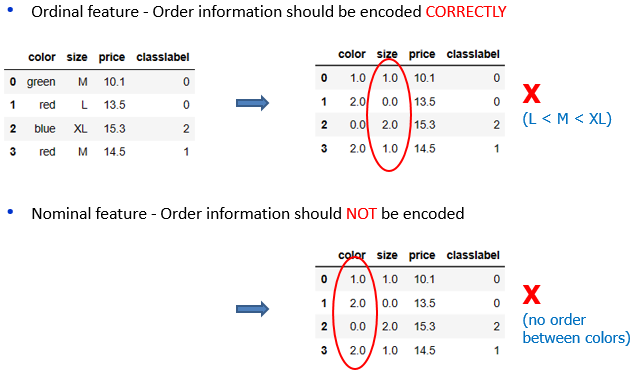

### Encoding ordinal features 

In [13]:
# encoding ordinal features using pandas
size_mapping = None

pdf['size'] = None
pdf

,color,size,price,classlabel
0,green,0,10.1,0
1,red,1,13.5,0
2,blue,2,15.3,2
3,red,0,14.5,1


In [14]:
from sklearn.preprocessing import OrdinalEncoder

# encoding ordinal features  scikit learn. use OrdinalEncoder
enc = None

sdf[['size']] = None
sdf

,color,size,price,classlabel
0,green,0.0,10.1,0
1,red,1.0,13.5,0
2,blue,2.0,15.3,2
3,red,0.0,14.5,1


### One-hot encoding of nominal features

In [15]:
# one-hot encoding 'color' using pandas. use get_dummies()
None

,size,price,classlabel,color_blue,color_green,color_red
0,0,10.1,0,0,1,0
1,1,13.5,0,0,0,1
2,2,15.3,2,1,0,0
3,0,14.5,1,0,0,1


In [16]:
from sklearn.preprocessing import OneHotEncoder

# one-hot encoding 'color' using scikit learn. use OneHotEncoder
enc = None

color_enc = enc.fit_transform(sdf[['color']])
print(color_enc)

# remake the data frame. use .concat()
sdf_color_enc = pd.DataFrame(color_enc, columns=['color0', 'color1', 'color2',])
sdf = None
sdf

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


,color0,color1,color2,size,price,classlabel
0,0.0,1.0,0.0,0.0,10.1,0
1,0.0,0.0,1.0,1.0,13.5,0
2,1.0,0.0,0.0,2.0,15.3,2
3,0.0,0.0,1.0,0.0,14.5,1


---

# 3. Transformation of numerical feature values

### Loading Wine Dataset

In [17]:
import pandas as pd
import numpy as np

df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Get X and y. Splitting data into 70% training, 30% test 

In [18]:
from sklearn.model_selection import train_test_split

# Get X and y. use .iloc[ , ]. Class label is at column 0
X = None
y = None

# Get training and test data. use train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0, stratify=y)

In [19]:
print(X_train.shape)
print(X_test.shape)

(124, 13)
(54, 13)


### Normalization
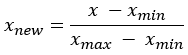

In [20]:
from sklearn.preprocessing import MinMaxScaler

# transform training and test data to min 0, max 1. use MinMaxScaler()
mms = None
X_train_norm = None
X_test_norm = None

In [21]:
# check normalized data
print(X_train[0:3, 0:5])
print(X_train_norm[0:3, 0:5])

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
[[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321 ]
 [0.67836257 0.15019763 0.65359477 0.59677419 0.38271605]]


### Standardization
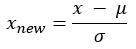

In [22]:
from sklearn.preprocessing import StandardScaler

# transform training and test data to mean 0, variance 1
stdsc = None
X_train_std = None
X_test_std = None

In [23]:
# check standardized data
print(X_train[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train[:,0].mean())
print(X_train_std[0:3, 0:5])
print('mean[0] = %.2f \n' % X_train_std[:,0].mean())

[[ 13.62   4.95   2.35  20.    92.  ]
 [ 13.76   1.53   2.7   19.5  132.  ]
 [ 13.73   1.5    2.7   22.5  101.  ]]
mean[0] = 13.03 

[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904]]
mean[0] = 0.00 



---

# 4. Feature selection

### Select Meaningful Features using information gain
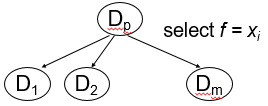
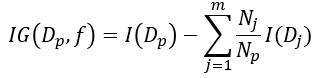

In [24]:
from sklearn.tree import DecisionTreeClassifier

# learning decision tree
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# train and test accuracies
print('Training accuracy:', tree.score(X_train, y_train))
print('Test accuracy:', tree.score(X_test, y_test))

Training accuracy: 1.0
Test accuracy: 0.9444444444444444


In [25]:
# feature names are in df_wine.columns 
feature_labels = df_wine.columns[1:]

# get the importances (amount of impurity reduction)
importances = None
print(importances)

# get the sorted indices in descending order
indices = None
print(indices)

# print feature names and importances in descending order
for f in range(X_train.shape[1]):
    print("%2d. %-30s %f" % (f+1, 
                             feature_labels[indices[f]], 
                             importances[indices[f]]))

[0.01745058 0.         0.         0.02392638 0.         0.
 0.39714318 0.01635992 0.         0.10565781 0.         0.
 0.43946214]
[12  6  9  3  0  7 11 10  8  5  4  2  1]
 1. Proline                        0.439462
 2. Flavanoids                     0.397143
 3. Color intensity                0.105658
 4. Alcalinity of ash              0.023926
 5. Alcohol                        0.017451
 6. Nonflavanoid phenols           0.016360
 7. OD280/OD315 of diluted wines   0.000000
 8. Hue                            0.000000
 9. Proanthocyanins                0.000000
10. Total phenols                  0.000000
11. Magnesium                      0.000000
12. Ash                            0.000000
13. Malic acid                     0.000000


In [26]:
# select 3 highest importance features
X_train_selected = None
print(X_train.shape)
print(X_train_selected.shape)

(124, 13)
(124, 3)


In [27]:
# learning decision tree with 3 highest features
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train_selected, y_train)

# train and test accuracies
print('Training accuracy:', tree.score(X_train_selected, y_train))

X_test_selected = None
print('Test accuracy:', tree.score(X_test_selected, y_test))

Training accuracy: 1.0
Test accuracy: 0.9629629629629629


---

### Select Meaningful Features using L1 regularization
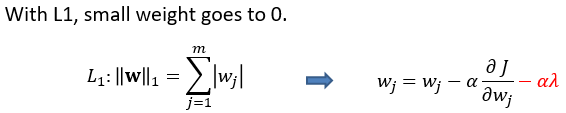

In [28]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with almost no regularization. Lamda = 0.0001. solver='liblinear'
lr = None 
None

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [29]:
# learned parameters
lr.coef_

array([[ 7.71272568e+00,  1.94780668e+00,  3.80194618e+00,
        -6.19481128e+00,  7.36210909e-01, -9.88461198e-03,
         5.28004968e+00,  1.00022801e+00,  1.47476408e+00,
        -2.11306879e+00, -1.64278864e+00,  3.73997690e+00,
         9.32208987e+00],
       [-6.94221103e+00, -3.20542340e+00, -7.99925180e+00,
         4.66786191e+00, -1.52846477e+00,  3.42930194e-01,
         5.50202135e+00,  2.39671003e+00, -7.92209646e-01,
        -2.00394584e+01,  5.91268865e+00,  5.48261916e-01,
        -1.62523849e+01],
       [ 4.63904636e+00,  1.06812842e+00,  4.01413378e+00,
         5.70026275e-01, -7.32997457e-02,  1.16498229e+00,
        -1.06967472e+01, -2.65032016e+00, -2.33343193e+00,
         9.97052275e+00, -7.33544540e+00, -3.99880614e+00,
         1.34899676e+00]])

In [30]:
from sklearn.linear_model import LogisticRegression

# Logistic regression with L1 regularization. Lamda = 1. solver='liblinear'
lr = None
None

print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 1.0
Test accuracy: 1.0


In [31]:
# learned parameters with L1
lr.coef_

array([[ 1.24629327,  0.17994723,  0.7463727 , -1.16396204,  0.        ,
         0.        ,  1.16037577,  0.        ,  0.        ,  0.        ,
         0.        ,  0.55759053,  2.50890943],
       [-1.53753494, -0.38693917, -0.99464742,  0.36391281, -0.05964231,
         0.        ,  0.66710827,  0.        ,  0.        , -1.93447081,
         1.23485264,  0.        , -2.23218908],
       [ 0.13558374,  0.168555  ,  0.3573916 ,  0.        ,  0.        ,
         0.        , -2.4372572 ,  0.        ,  0.        ,  1.5634609 ,
        -0.81897265, -0.49288242,  0.        ]])

---

# 5. Dimensionality Reduction
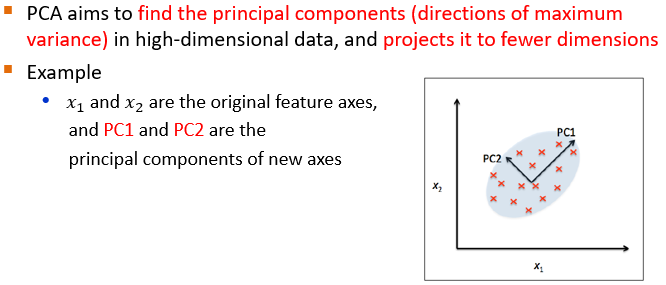

### Loading Wine Dataset

In [32]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/'
                      'machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Get X and y. Splitting data into 70% training & 30% test 

In [33]:
from sklearn.model_selection import train_test_split

# Get X and y. Class label is at column 0
X = df_wine.iloc[:, 1:].values
y = df_wine.iloc[:, 0].values

# Get training and test data. use train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, random_state=0, stratify=y)

X_train.shape

(124, 13)

In [34]:
from sklearn.preprocessing import StandardScaler

# standardized the training and test data
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Compute covariance matrix 
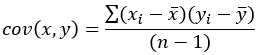
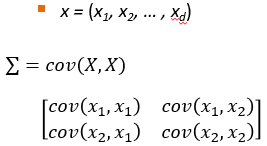

In [35]:
print(X_train_std.shape)
print(X_train_std[:3])

(124, 13)
[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
  -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879
   0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269
   1.47568796]
 [ 0.84585645 -0.73022996  1.17533605  0.81104754  0.13597904  1.09807851
   1.16326665 -0.64419483  1.25249578  0.25863359  1.06806189  0.1308109
   1.62934866]]


In [36]:
import numpy as np

# compute covariance matrix of X. use np.cov()
cov_mat = None
print(cov_mat.shape)
print(cov_mat)

(13, 13)
[[ 1.00813008  0.06709556  0.17405351 -0.35439069  0.26374703  0.29079481
   0.21835807 -0.08111974  0.10436705  0.54282846  0.05893536 -0.01797029
   0.6415292 ]
 [ 0.06709556  1.00813008  0.08326463  0.26356776 -0.11349172 -0.33735555
  -0.41035281  0.33653916 -0.21602672  0.17504154 -0.551593   -0.40561695
  -0.24089991]
 [ 0.17405351  0.08326463  1.00813008  0.46420355  0.29092834  0.18020384
   0.15537535  0.15918823 -0.00703776  0.20549146  0.00665422  0.02039019
   0.223495  ]
 [-0.35439069  0.26356776  0.46420355  1.00813008 -0.07406447 -0.28060672
  -0.31391899  0.31581353 -0.24621059 -0.08872685 -0.22595587 -0.16799906
  -0.46393412]
 [ 0.26374703 -0.11349172  0.29092834 -0.07406447  1.00813008  0.25667578
   0.21025773 -0.26003426  0.19601657  0.20606456  0.13359768  0.06633258
   0.41810999]
 [ 0.29079481 -0.33735555  0.18020384 -0.28060672  0.25667578  1.00813008
   0.87123661 -0.44979792  0.62334099 -0.05689854  0.50664086  0.71978745
   0.52986924]
 [ 0.21835807

### Compute eigen vectors and eigen values of covariance matrix A


In [37]:
# find eigenvalues and eigenvectors of covariance matrix. use np.linalg.eig()
eigen_vals, eigen_vecs = None

print('\nEigenvalues \n%s' % eigen_vals)
print('\nEigenvectors \n%s' % eigen_vecs)


Eigenvalues 
[4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]

Eigenvectors 
[[-1.37242175e-01  5.03034778e-01 -1.37748734e-01 -3.29610003e-03
   2.90625226e-01 -2.99096847e-01 -7.90529293e-02  3.68176414e-01
   3.98377017e-01 -9.44869777e-02  3.74638877e-01 -1.27834515e-01
   2.62834263e-01]
 [ 2.47243265e-01  1.64871190e-01  9.61503863e-02  5.62646692e-01
  -8.95378697e-02 -6.27036396e-01  2.74002014e-01  1.25775752e-02
  -1.10458230e-01  2.63652406e-02 -1.37405597e-01  8.06401578e-02
  -2.66769211e-01]
 [-2.54515927e-02  2.44564761e-01  6.77775667e-01 -1.08977111e-01
   1.60834991e-01 -3.89128239e-04 -1.32328045e-01 -1.77578177e-01
  -3.82496856e-01  1.42747511e-01  4.61583035e-01  1.67924873e-02
  -1.15542548e-01]
 [ 2.06945084e-01 -1.13529045e-01  6.25040550e-01  3.38187002e-02
  -5.15873402e-02  4.05836452e-02 -2.23999097e-01  4.40592110e-01
   2.43373853e-01 -1.30485780e-01 -4.18953

### Projection of training data to new 13 dimensions 



In [38]:
# projection of training data by using matrix W = 13 eigen vectors
X_train_pca = None

In [39]:
print(X_train_std[0])
print(X_train_pca[0])

[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
[ 2.38299011  0.45458499 -0.22703207  0.57988399  0.57994169 -1.73317476
  0.70180475  0.21617248  0.23666876  0.40161994  0.16548767 -0.23489704
 -0.29726982]


### projection to 2 dimensions corresponding to 2 largest eigenvalues



In [40]:
# W = 2 eigen vectors with biggest eigen values
w = None
print(w)

[[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


In [41]:
# projection of training data by using matrix W = 2 eigen vectors
X_train_pca = None

In [42]:
print(X_train_std[0])
print(X_train_pca[0])

[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
[2.38299011 0.45458499]


---

### Principal Component Analysis using scikit-learn

In [43]:
from sklearn.decomposition import PCA

# transform training data by pca. use PCA() 
pca = None
X_train_pca = None

In [44]:
print(X_train_std[0])
print(X_train_pca[0])

[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
[ 2.38299011  0.45458499 -0.22703207  0.57988399 -0.57994169 -1.73317476
  0.70180475  0.21617248 -0.23666876 -0.16548767  0.29726982  0.23489704
 -0.40161994]


### Explained variance ratio for each component 

In [45]:
# the ratio between the variance of each principal component and the total variance
print(None)

[0.36951469 0.18434927 0.11815159 0.07334252 0.06422108 0.05051724
 0.03954654 0.02643918 0.02389319 0.01629614 0.01380021 0.01172226
 0.00820609]


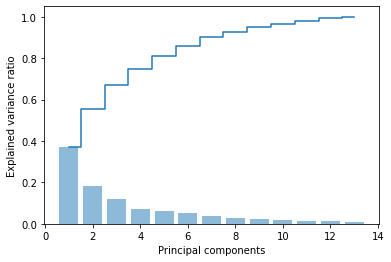

In [46]:
import matplotlib.pyplot as plt

# bar plot the variance ratio of each principal component. for step plot, use np.cumsum()
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.show()

### Projection to 2 dimensions

In [47]:
# dimension reduction of training and test data to 2 by pca
pca = None
X_train_pca = None
X_test_pca = None

In [48]:
print(X_train_std[0])
print(X_train_pca[0])

[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
 -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
 -0.62946362]
[2.38299011 0.45458499]


### Visualizing data in 2 dimensions with PC1 and PC2

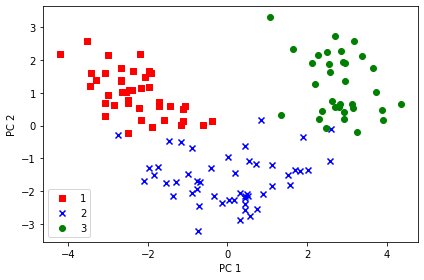

In [49]:
classes = np.unique(y_train)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(classes, colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### Logistic regression with 2 dimensional data

In [50]:
from sklearn.linear_model import LogisticRegression

# logistic regression using 2D data
lr = LogisticRegression()
None

In [51]:
acc = lr.score(X_train_pca, y_train)
print("Train accuracy : %.4f" % acc)
acc = lr.score(X_test_pca, y_test)
print("Test accuracy : %.4f" % acc)

Train accuracy : 0.9839
Test accuracy : 0.9259


### Decision boundary

In [52]:
# A function for plotting decision regions
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl) 

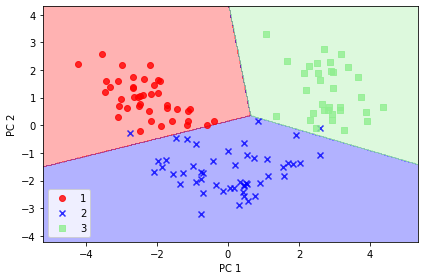

In [53]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

---

# Quiz : Kaggle Tutorial Competition
### Predict survival on the Titanic
- Data Preprocessing
    1. Remove irrelavant features - PassengerId, Name, Ticket, Cabin
    2. Convert categorical features to numerical 
    3. Impute missing data
    4. Standardize numerical features
    5. Dimensionality Reduction by PCA on numerical features  
    
    
- Build and Evaluate Models
    - Logistic Regression
    - Decision Tree
    - K-Nearest Neighbors
    - SVM
    
    
- Data Dictionary (891 samples)
  - **Pclass** : Ticket class : 1 = 1st, 2 = 2nd, 3 = 3rd
  - **Sex** : 'male', 'female'
  - **Age** : Age in years
  - **SibSp** : Number of Siblings / Spouses aboard the Titanic
  - **Parch** : Number of Parents / Children aboard the Titanic
  - **Ticket** : Ticker Number
  - **Fare** : Passenger fare
  - **Cabin** : Cabin number
  - **Embarked** : Port of Embarkation : C = Cherbourg, Q = Queentown, S = Southampton
  
  
- target : **Survived** : 0 = No, 1 = Yes
- https://www.kaggle.com/c/titanic/data

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Dataset

In [55]:
# read titanic.csv
df = pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Removing irrelavant features
   - PassengerId, Name, Ticket, Cabin

In [56]:
# remove irrelavant feafures. use .drop()
df_select = None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S


### Handling categorical features
- Nominal feature :  
   - Sex : encode to 0, 1  
   - Embarked : one-hot encoding  
- Ordinal feature : 
    - Pclass(already mapped(integer vlaue))

In [57]:
from sklearn.preprocessing import LabelEncoder

# label encoding "Sex". use LabelEncoder()
enc = None
df_select["Sex"] = None

df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S


In [58]:
# one-hot encoding "Embarked" using pd.get_dummies()
df_select = None
df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1


### Handling missing values
- Impute missing values
    - Age

In [59]:
# Check missing value ratio
df_select.isnull().sum()/len(df_select)

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653
SibSp         0.000000
Parch         0.000000
Fare          0.000000
Embarked_C    0.000000
Embarked_Q    0.000000
Embarked_S    0.000000
dtype: float64

In [60]:
# Impute missing values by mean
df_select = None
df_select

C:\Users\win\AppData\Local\Temp\ipykernel_23852\464222428.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_select = df_select.fillna(df.mean())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.000000,1,0,7.2500,0,0,1
1,1,1,0,38.000000,1,0,71.2833,1,0,0
2,1,3,0,26.000000,0,0,7.9250,0,0,1
3,1,1,0,35.000000,1,0,53.1000,0,0,1
4,0,3,1,35.000000,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,0,0,1
887,1,1,0,19.000000,0,0,30.0000,0,0,1
888,0,3,0,29.699118,1,2,23.4500,0,0,1
889,1,1,1,26.000000,0,0,30.0000,1,0,0


### Standardizing numerical features - you may do it with data frame or with numpy array
- Age, SibSp, Parch, Fare
- Standardize based on training set

In [61]:
from sklearn.model_selection import train_test_split

# split the dataset by index. to preprocess with dataframe. stratify with 'Survived' value
idx = df_select.index 
train_idx, test_idx = train_test_split(idx, test_size=0.3, random_state=0, stratify=df_select["Survived"])

In [62]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# fit to train set. use .loc() to choose train_idx rows and ["Age", "SibSp", "Parch", "Fare"] columns from dataframe
sc.fit(df_select.loc[train_idx,["Age", "SibSp", "Parch", "Fare"]].values)

# transform column ["Age", "SibSp", "Parch", "Fare"] of entire data set 
df_select[["Age", "SibSp", "Parch", "Fare"]] = None

df_select.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,-0.588800,0.449557,-0.479735,-0.488829,0,0,1
1,1,1,0,0.657119,0.449557,-0.479735,0.695553,1,0,0
2,1,3,0,-0.277320,-0.480922,-0.479735,-0.476344,0,0,1


### Dimensionality reduction by PCA - you may do it with data frame or with numpy array
- Apply PCA to numerical features - Age, SibSp, Parch, Fare
- Use training data

In [63]:
from sklearn.decomposition import PCA

# PCA. Fit to train dataset. use .loc() to choose train_idx rows and ["Age", "SibSp", "Parch", "Fare"] columns from dataframe
pca = None
None

PCA()

In [64]:
# check explained variance 
np.cumsum(pca.explained_variance_ratio_)

array([0.41189633, 0.6809093 , 0.85531871, 1.        ])

In [65]:
# transform column ["Age", "SibSp", "Parch", "Fare"] of entire data set to new 4D
pc = None
# choose first 2 principal components
pc12 = pc[:,:2]

# make dataframe from pc12
df_pc12 = pd.DataFrame(pc12, columns=["PC1", "PC2"])
df_pc12.head()

,PC1,PC2
0,0.083426,-0.802923
1,-0.092440,0.892115
2,-0.611231,-0.569906
3,-0.091341,0.485317
4,-0.895380,-0.133483


In [66]:
# Drop original features - Age, SibSp, Parch, Fare
df_select = df_select.drop(["Age", "SibSp", "Parch", "Fare"], axis=1)

# Concat dataframe with PC1, PC2
df_reduced = None
df_reduced.head()

,Survived,Pclass,Sex,Embarked_C,Embarked_Q,Embarked_S,PC1,PC2
0,0,3,1,0,0,1,0.083426,-0.802923
1,1,1,0,1,0,0,-0.092440,0.892115
2,1,3,0,0,0,1,-0.611231,-0.569906
3,1,1,0,0,0,1,-0.091341,0.485317
4,0,3,1,0,0,1,-0.895380,-0.133483


### Get X and y

In [67]:
# get Train set X, y and test set X, y 
y_train = df_reduced.loc[train_idx].values[:,0]
y_test = df_reduced.loc[test_idx].values[:,0]

X_train = None
X_test = None

# check the size of dataset
X_train.shape

(623, 7)

### Model : Logistic Regression

In [68]:
# learn logistic regression model
from None

lr = None
None

LogisticRegression(C=1000.0, penalty='l1', random_state=1, solver='liblinear')

In [69]:
# compute the train test accuracy
None
None

Train accuracy : 0.7849
Test accuracy : 0.8060


### Model : Decision Tree Classifier

In [70]:
# learn decision tree model
from None

tree = None
None

DecisionTreeClassifier(max_depth=3)

In [71]:
# compute the train test accuracy
None
None

Train accuracy : 0.8299
Test accuracy : 0.8022


### Model : K-Nearest Neighbors

In [72]:
# learn k-NN model
from None

knn = None
None

KNeighborsClassifier(p=1)

In [73]:
# compute the train test accuracy
None
None

Train accuracy : 0.8443
Test accuracy : 0.8209


### Model : SVM

In [74]:
# learn SVM model
from None

svm = None
None

SVC(gamma=0.2, random_state=1)

In [75]:
# compute the train test accuracy
None
None

Train accuracy : 0.8266
Test accuracy : 0.8060


### Model accuracy comparison

In [76]:
# get the accuracy of 4 models
models = [lr, tree, knn, svm]
train_acc = []
test_acc = []

for m in models:
    train_acc.append(m.score(X_train, y_train))
    test_acc.append(m.score(X_test, y_test))

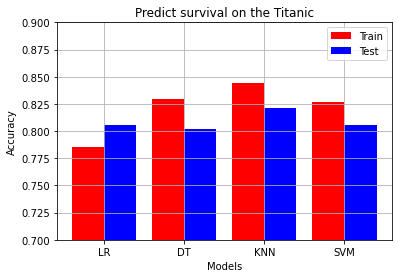

In [77]:
# bar plot the train/test accuracies of 4 models

model_names = ["LR", "DT", "KNN", "SVM"]
# to position it nicely on x axis
ypos=np.arange(len(model_names))

plt.bar(ypos-0.2, train_acc, width=0.4, label='Train', color='red')
plt.bar(ypos+0.2, test_acc, width=0.4, label='Test', color='blue')

plt.title('Predict survival on the Titanic')
plt.xticks(ypos, model_names)
plt.xlabel('Models')
plt.ylabel('Accuracy')

plt.legend()
plt.ylim(0.7, 0.9)
plt.grid()
plt.show()